# Lesson 4

## Working with APIs recap

Anatomy of a URL:

    https://www.google.com/search?q=bangalore?hl=en#983y49832y4

URL is typically made of hostname/path?query-params#fragment

- fragment is only used by browser and not sent to server
- hostname indicates website we are asking
- path specifies the resource we are requesting
- query - params - specify a subsection of what to get from that resource

When we construct a URL, the inputs could be part of the path or the query parameters. Could be either!!

when we encode a URL, spaces include special characters.

If we use the nominatum API, the input is passed as query parameter 'q'

https://nominatim.openstreetmap.org/search.php?q=bangalore&format=jsonv2 

When we pass input as query params, we need to encode the values. Usually we don't do this by hand, we let the requests library handle it for us by passing 'params' as a dictionary. 

Some APIs, the input is part of the path. For example, the dictionary API:
https://api.dictionaryapi.dev/api/v2/entries/en/banana


## GET vs POST

There are two methods to send HTTP requests (most common). GET and POST.

With a GET request, we send the input data as part of the URL, possibly as a query string.

There would be times where we need to send a lot of data, possibly in a structured format. In those cases, we send the data as a payload to the request and not part of the URL. In these cases we use POST method.

Typically, GET requests doesn't change anything in the server. POST requests typically change something.

In [5]:
## Maybe example post request making some kind of change, but don't read into this too much
!curl -i \
    -H 'Concent-type: application/json' \
    -d '{"start": 1, "stop": 20, "step": 3}' \
    https://numbers.apps.pipal.in/range

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0curl: (6) Could not resolve host: application
curl: (3) URL rejected: Bad hostname
curl: (3) URL rejected: Port number was not a decimal number between 0 and 65535
curl: (3) URL rejected: Bad hostname
curl: (3) URL rejected: Port number was not a decimal number between 0 and 65535
curl: (3) unmatched close brace/bracket in URL position 2:
3}'
 ^


## DATA Analysis

In [13]:
import pandas as pd

In [12]:
!python -m pip install pandas

In [14]:
ls *.csv

 Volume in drive C is Windows
 Volume Serial Number is 440E-6FD4

 Directory of C:\Users\vicki\OneDrive\Documents\Github\practicalcomputing\notebooks

10/28/2024  04:22 PM             6,296 un-min.csv
               1 File(s)          6,296 bytes
               0 Dir(s)  823,686,701,056 bytes free


In [16]:
df = pd.read_csv("un-min.csv")

In [19]:
df.head(11)

,country,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
0,Afghanistan,Asia,45.0,46.0,154,2848
1,Albania,Europe,68.0,74.0,32,863
2,Algeria,Africa,67.5,70.3,44,1531
3,Angola,Africa,44.9,48.1,124,355
4,Argentina,America,69.6,76.8,22,8055
5,Armenia,Europe,67.2,74.0,25,354
6,Australia,Oceania,75.4,81.2,6,20046
7,Austria,Europe,73.7,80.1,6,29006
8,Azerbaijan,Asia,66.5,74.5,33,321
9,Bahamas,America,70.5,77.1,14,12545


In [20]:
df.shape

(188, 6)

In [21]:
df.describe()

,lifeMale,lifeFemale,infantMortality,GDPperCapita
count,188.000000,188.000000,188.000000,188.000000
mean,63.526064,68.309043,44.308511,5890.595745
std,9.820235,11.085095,38.896964,8917.273130
min,36.000000,39.100000,3.000000,36.000000
25%,57.275000,58.625000,12.000000,426.500000
50%,66.500000,71.950000,30.500000,1654.500000
75%,70.675000,76.250000,71.250000,6730.500000
max,77.400000,82.900000,169.000000,42416.000000


In [22]:
df.set_index("country", inplace=True)

In [23]:
df.head()

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
Afghanistan,Asia,45.0,46.0,154,2848
Albania,Europe,68.0,74.0,32,863
Algeria,Africa,67.5,70.3,44,1531
Angola,Africa,44.9,48.1,124,355
Argentina,America,69.6,76.8,22,8055


In [24]:
df.GDPperCapita.head()

country
Afghanistan    2848
Albania         863
Algeria        1531
Angola          355
Argentina      8055
Name: GDPperCapita, dtype: int64

In [25]:
df.GDPperCapita.mean()

np.float64(5890.595744680851)

In [26]:
df.GDPperCapita.max()

np.int64(42416)

How is wealth distributed across countries in the world?

<Axes: >

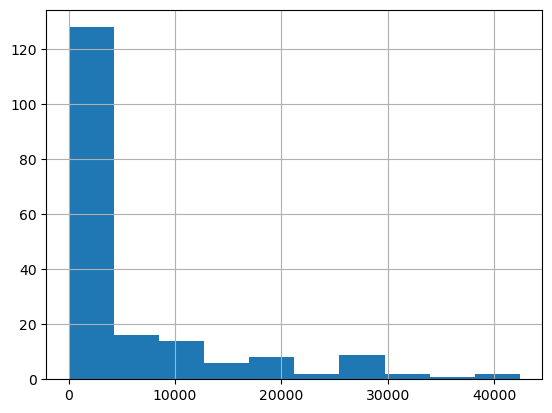

In [29]:
df.GDPperCapita.hist()

<Axes: >

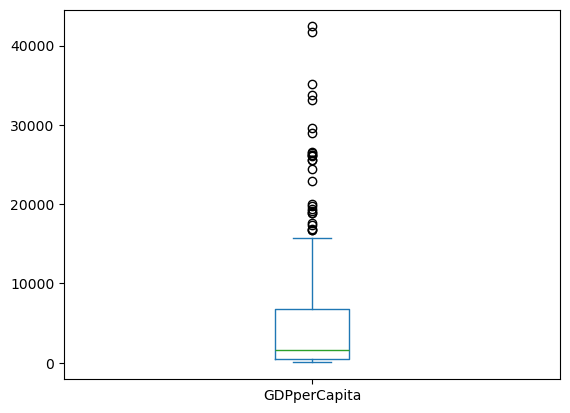

In [31]:
df.GDPperCapita.plot(kind="box")

In [32]:
## reminder that bands in box plot are quartiles

In [35]:
## What are the top 10 poorest countries?
df.GDPperCapita.sort_values().head(10)

country
Sudan                    36
Mozambique               77
Ethiopia                 96
Eritrea                  96
Dem.Rep.of.the.Congo    117
Somalia                 119
Tajikistan              122
Cambodia                130
Guinea.Bissau           131
Tanzania                139
Name: GDPperCapita, dtype: int64

In [38]:
## What are the top 10 richest countries?
df.GDPperCapita.sort_values(ascending=False).head(10)

country
Switzerland    42416
Japan          41718
Luxembourg     35109
Norway         33734
Denmark        33191
Germany        29632
Austria        29006
Belgium        26582
France         26444
Sweden         26253
Name: GDPperCapita, dtype: int64

In [39]:
## Show everything for 10 richest countries
df.sort_values("GDPperCapita",ascending=False).head(10)

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
Switzerland,Europe,75.3,81.8,5,42416
Japan,Asia,76.9,82.9,4,41718
Luxembourg,Europe,73.1,79.7,6,35109
Norway,Europe,74.8,80.6,5,33734
Denmark,Europe,73.0,78.3,7,33191
Germany,Europe,73.4,79.9,6,29632
Austria,Europe,73.7,80.1,6,29006
Belgium,Europe,73.9,80.6,7,26582
France,Europe,74.6,82.9,7,26444


In [40]:
## How many countries with GDP less than 100

df[df.GDPperCapita < 100]

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
Eritrea,Africa,49.1,52.1,98,96
Ethiopia,Africa,48.4,51.6,107,96
Mozambique,Africa,45.5,48.4,110,77
Sudan,Africa,53.6,56.4,71,36


In [42]:
## Find all countries with GDP more than 20000 and sort based on GDP!

df[df.GDPperCapita > 20000].sort_values("GDPperCapita",ascending=False)

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
Switzerland,Europe,75.3,81.8,5,42416
Japan,Asia,76.9,82.9,4,41718
Luxembourg,Europe,73.1,79.7,6,35109
Norway,Europe,74.8,80.6,5,33734
Denmark,Europe,73.0,78.3,7,33191
Germany,Europe,73.4,79.9,6,29632
Austria,Europe,73.7,80.1,6,29006
Belgium,Europe,73.9,80.6,7,26582
France,Europe,74.6,82.9,7,26444


In [43]:
df[df.index == "India"]

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
India,Asia,62.1,62.7,72,365


In [44]:
df.loc["India"]

region             Asia
lifeMale           62.1
lifeFemale         62.7
infantMortality      72
GDPperCapita        365
Name: India, dtype: object

In [45]:
## Can we correlate GDP with infant mortality?

<Axes: xlabel='GDPperCapita', ylabel='infantMortality'>

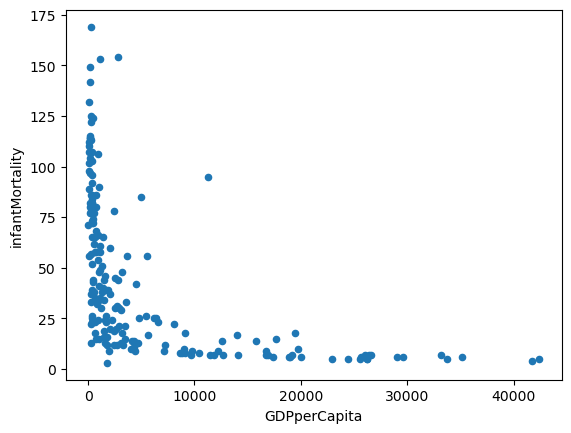

In [46]:
df.plot(kind="scatter",x="GDPperCapita", y="infantMortality")

In [47]:
df[(df.GDPperCapita > 10000) & (df.infantMortality > 75)]

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
Iraq,Asia,60.9,63.9,95,11308


In [48]:
df.head()

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
Afghanistan,Asia,45.0,46.0,154,2848
Albania,Europe,68.0,74.0,32,863
Algeria,Africa,67.5,70.3,44,1531
Angola,Africa,44.9,48.1,124,355
Argentina,America,69.6,76.8,22,8055


<Axes: xlabel='GDPperCapita', ylabel='infantMortality'>

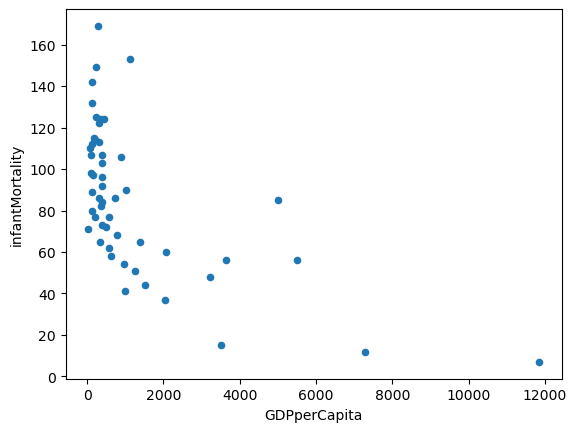

In [49]:
df[df.region == 'Africa'].plot(kind="scatter", x="GDPperCapita", y="infantMortality")

In [51]:
df['region'].head(10)

country
Afghanistan       Asia
Albania         Europe
Algeria         Africa
Angola          Africa
Argentina      America
Armenia         Europe
Australia      Oceania
Austria         Europe
Azerbaijan        Asia
Bahamas        America
Name: region, dtype: object

In [54]:
df.groupby('region').mean()

,lifeMale,lifeFemale,infantMortality,GDPperCapita
region,,,,
Africa,52.052830,55.286792,86.320755,1217.641509
America,69.082857,74.474286,26.657143,5080.085714
Asia,65.373913,69.439130,43.782609,5453.195652
Europe,70.362500,77.545000,11.575000,12860.050000
Oceania,67.464286,72.092857,24.642857,7131.785714


In [56]:
df_region = df.groupby('region').mean()

In [57]:
df_region

,lifeMale,lifeFemale,infantMortality,GDPperCapita
region,,,,
Africa,52.052830,55.286792,86.320755,1217.641509
America,69.082857,74.474286,26.657143,5080.085714
Asia,65.373913,69.439130,43.782609,5453.195652
Europe,70.362500,77.545000,11.575000,12860.050000
Oceania,67.464286,72.092857,24.642857,7131.785714


<Axes: ylabel='region'>

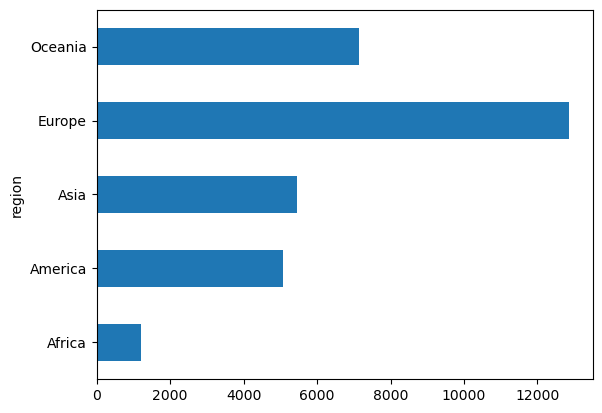

In [59]:
df_region.GDPperCapita.plot(kind="barh")

In [60]:
df['lifeMean'] = (df.lifeMale + df.lifeFemale) / 2

In [63]:
df['lifeRatio'] = (df.lifeMale / df.lifeFemale)

In [68]:
## Countries where men live longer than women
df[df.lifeRatio > 1]

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita,lifeMean,lifeRatio
country,,,,,,,
Maldives,Asia,65.7,63.3,49,1079,64.50,1.037915
Nepal,Asia,57.6,57.1,82,203,57.35,1.008757


In [69]:
df.sort_values("lifeRatio").head()

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita,lifeMean,lifeRatio
country,,,,,,,
Russia,Europe,58.0,71.5,19,2451,64.75,0.811189
Latvia,Europe,62.5,74.3,16,1764,68.40,0.841184
Estonia,Europe,63.9,75.0,12,2433,69.45,0.852000
Lithuania,Europe,64.9,76.0,13,1595,70.45,0.853947
Ukraine,Europe,63.6,74.0,18,694,68.80,0.859459


<Axes: >

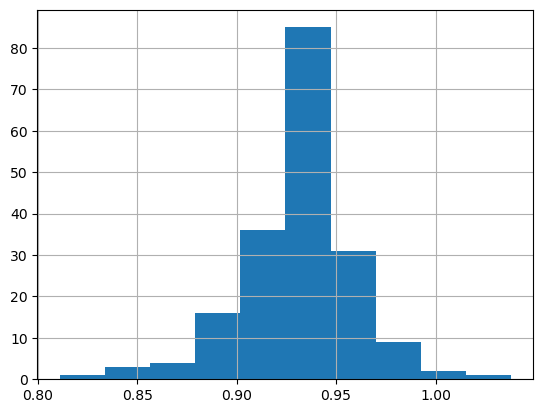

In [71]:
df['lifeRatio'].hist()